In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline


In [2]:
econ = pd.read_csv("Data/macrodata.csv", index_col=0, parse_dates=True)

In [3]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 23.8 KB


In [5]:
econ.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

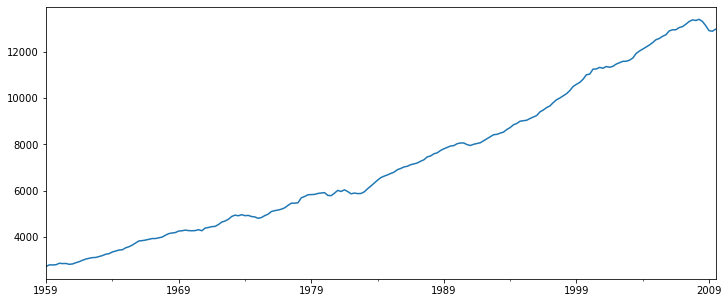

In [6]:
# Ploting the GDP

econ['realgdp'].plot(figsize=(12,5))

In [8]:
# Importing from statsmodel library, the hp filter to filter the trend and cyclical component from the dataset

from statsmodels.tsa.filters.hp_filter import hpfilter

In [13]:
gdp_cycle, gdp_trend = hpfilter(econ['realgdp'],lamb=1600)

In [14]:
type(gdp_trend)   # return the series

pandas.core.series.Series

In [15]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp_trend, Length: 203, dtype: float64

<AxesSubplot:>

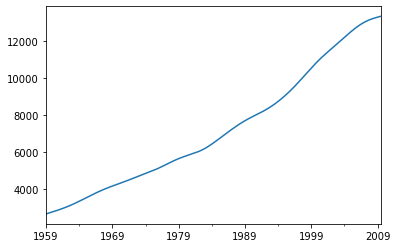

In [18]:
gdp_trend.plot()

<AxesSubplot:>

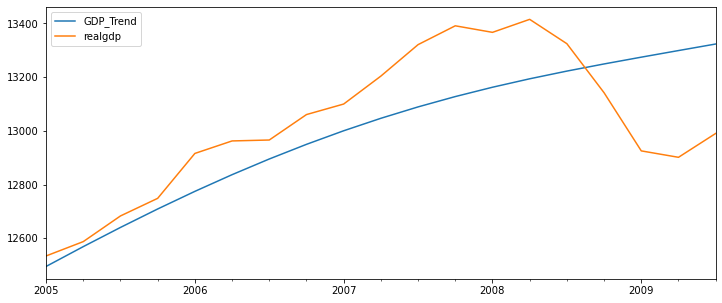

In [20]:
# Plotting thr Gdp and Gdp trend 

econ['GDP_Trend'] = gdp_trend
econ[['GDP_Trend', 'realgdp']]['2005-01-01':].plot(figsize=(12,5))

### ETS Model:  (Error-Trend-Seasonality)

<font color = red> <b> ETS Decomposition

In [21]:
airline = pd.read_csv("Data/airline_passengers.csv", index_col="Month", parse_dates=True)

In [22]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [23]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [24]:
# There are 144 null values.
# we will drop the null value as we can not perform the ETS Decompostion

airline = airline.dropna()

In [25]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<AxesSubplot:xlabel='Month'>

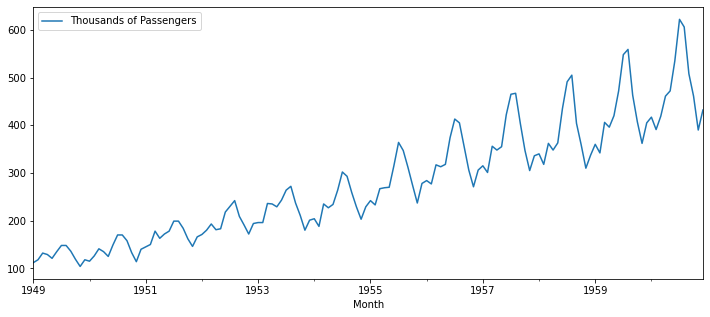

In [26]:
# Plotting the data

airline.plot(figsize=(12,5))

<font color = blue>  <b>From the above graph we can see that data is increasing slightly non linearly or exponentialy so we will go with Multiplicative model.
    
<font color = green> <b> If the Trend and Seasonality in the data is linear or constant with time we will go with additive approch. And if the treand and seasionality in data is vaolatile or grows exponentially with time we will go with multiplicative approach.

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative') #Selecting the Multiplicative Model

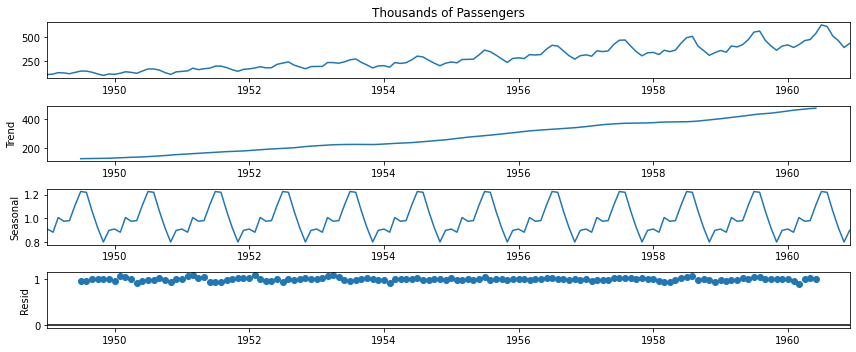

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
result.plot();

### Exponential Weighted Moving Average

In [33]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [34]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [35]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<AxesSubplot:xlabel='Month'>

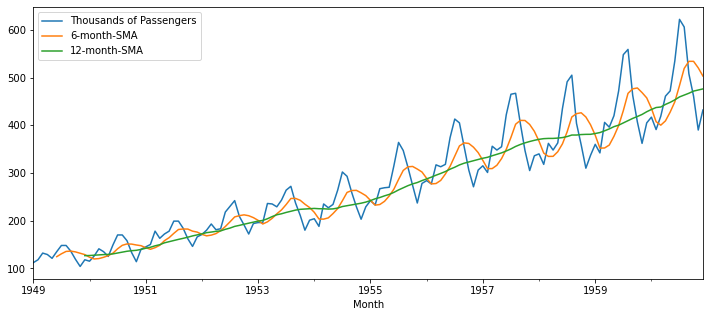

In [36]:
airline.plot(figsize=(12,5))

In [38]:
# EWMA
# Span is use to define the alpha, N-Day EW moving Average
# aplpa  = 2 /(span+1)

airline['EWMA'] = airline["Thousands of Passengers"].ewm(span=12).mean() # Span is 12 monthbb

In [41]:
airline.tail()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA
Month,,,,
1960-08-01,606,519.166667,463.333333,494.898620
1960-09-01,508,534.000000,467.083333,496.914217
1960-10-01,461,534.000000,471.583333,491.388952
1960-11-01,390,520.333333,473.916667,475.790652
1960-12-01,432,503.166667,476.166667,469.053629


<AxesSubplot:xlabel='Month'>

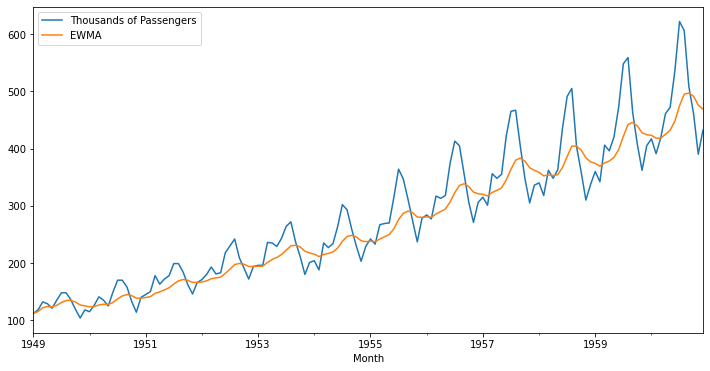

In [42]:
# Plot

airline[['Thousands of Passengers','EWMA']].plot(figsize=(12,6))

<AxesSubplot:xlabel='Month'>

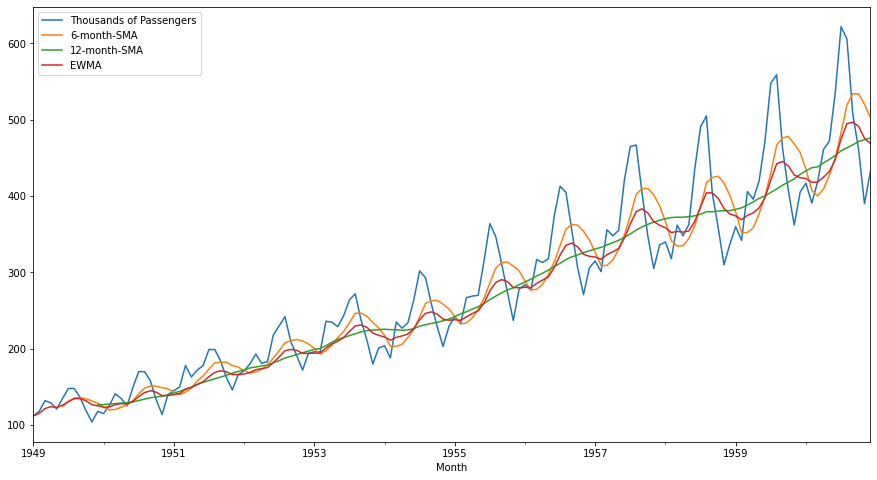

In [43]:
airline.plot(figsize=(15,8))

### Holt's Winters Methods

In [44]:
airline = pd.read_csv("Data/airline_passengers.csv", index_col='Month', parse_dates=True)

In [45]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [46]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [48]:
# Assinging the Offeset Aliases or Frequency to index

airline.index.freq  = 'MS'   # Monthly Freq

In [49]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

<font color = red> <b> Simple Exponential Smoothing

In [50]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [51]:
# Assinging the span and alpha

span = 12
alpha = 2/(span+1)

In [52]:
airline['EWMA12'] = airline["Thousands of Passengers"].ewm(alpha=alpha, adjust=False).mean()

In [54]:
airline.tail()

,Thousands of Passengers,EWMA12
Month,,
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952
1960-11-01,390,475.790652
1960-12-01,432,469.053629


In [55]:
# Calculating the Simple Exp Smoothing using Statsmodel

model = SimpleExpSmoothing(airline["Thousands of Passengers"])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [56]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [57]:
airline['SES12'] = fitted_model.fittedvalues.shift(-1)

In [60]:
airline.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<AxesSubplot:xlabel='Month'>

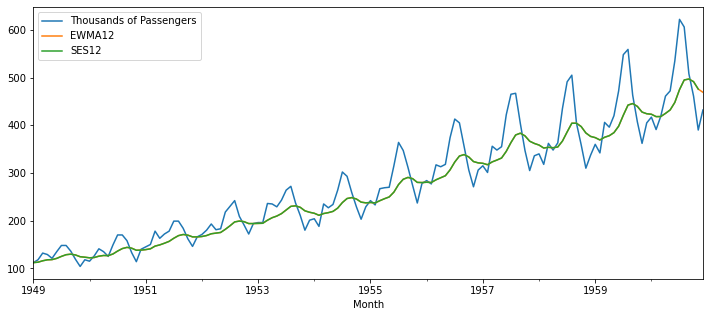

In [61]:
airline.plot(figsize=(12,5))

<font color = red> <b> Double Exponentail Smoothing

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<font color = green> <b> Additive Method

In [63]:
airline["DES-12"] = ExponentialSmoothing(airline["Thousands of Passengers"], trend="add").fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [64]:
airline.head()

,Thousands of Passengers,EWMA12,SES12,DES-12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.221156
1949-02-01,118,112.923077,112.923077,120.175837
1949-03-01,132,115.857988,115.857988,134.115056
1949-04-01,129,117.879836,117.879836,131.244976
1949-05-01,121,118.359861,118.359861,123.283465


In [65]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES-12'], dtype='object')

<AxesSubplot:xlabel='Month'>

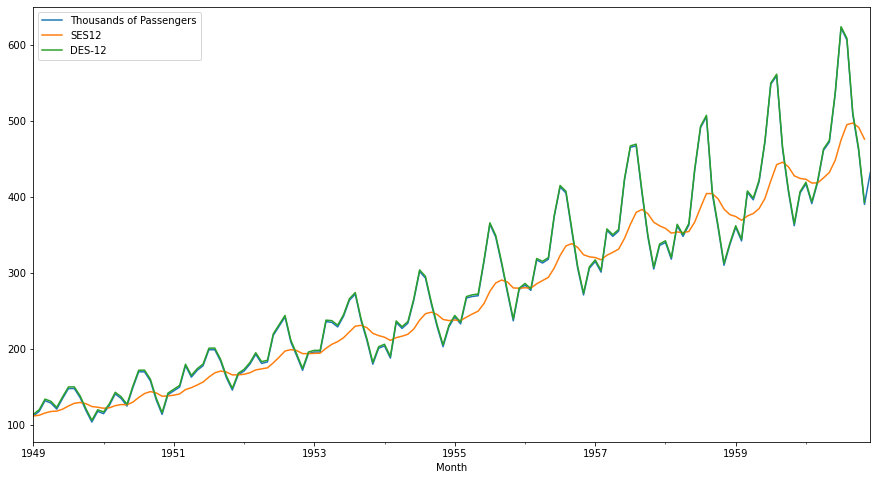

In [66]:
airline[['Thousands of Passengers', 'SES12', 'DES-12']].plot(figsize=(15,8))

<AxesSubplot:xlabel='Month'>

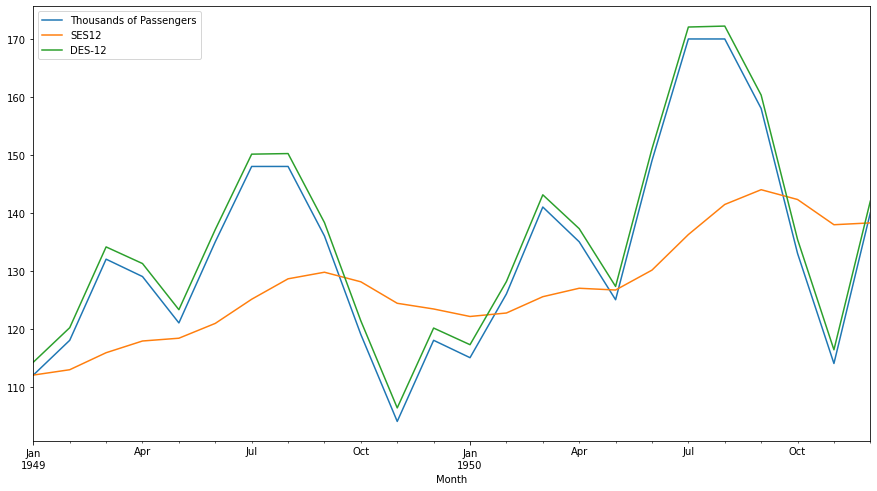

In [94]:
# Plotting the First 2 years of data
airline[['Thousands of Passengers', 'SES12', 'DES-12']].iloc[:24].plot(figsize=(15,8))

<font color = green> <b> Multiplicative Method

In [67]:
airline["DES-Mul=12"] = ExponentialSmoothing(airline["Thousands of Passengers"], trend="mul").fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [68]:
airline.head()

,Thousands of Passengers,EWMA12,SES12,DES-12,DES-Mul=12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.221156,112.688538
1949-02-01,118,112.923077,112.923077,120.175837,118.725424
1949-03-01,132,115.857988,115.857988,134.115056,132.811491
1949-04-01,129,117.879836,117.879836,131.244976,129.793048
1949-05-01,121,118.359861,118.359861,123.283465,121.743867


<AxesSubplot:xlabel='Month'>

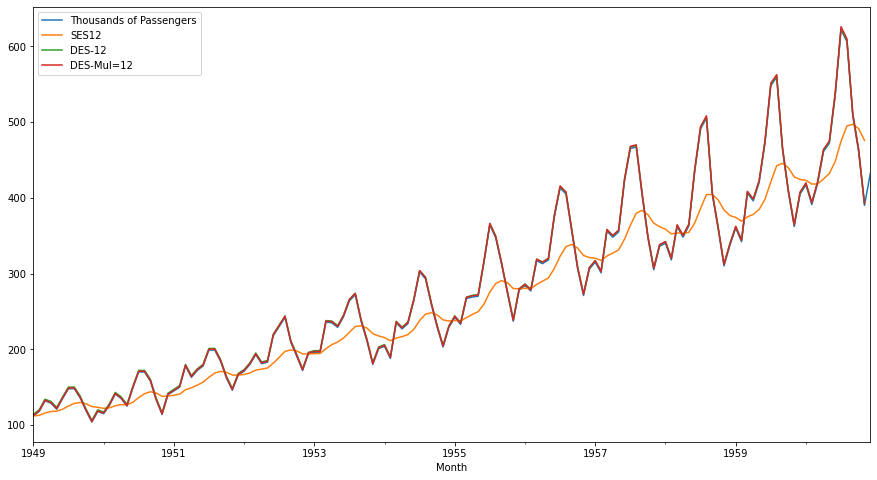

In [69]:
airline[['Thousands of Passengers', 'SES12', 'DES-12', 'DES-Mul=12']].plot(figsize=(15,8))

<AxesSubplot:xlabel='Month'>

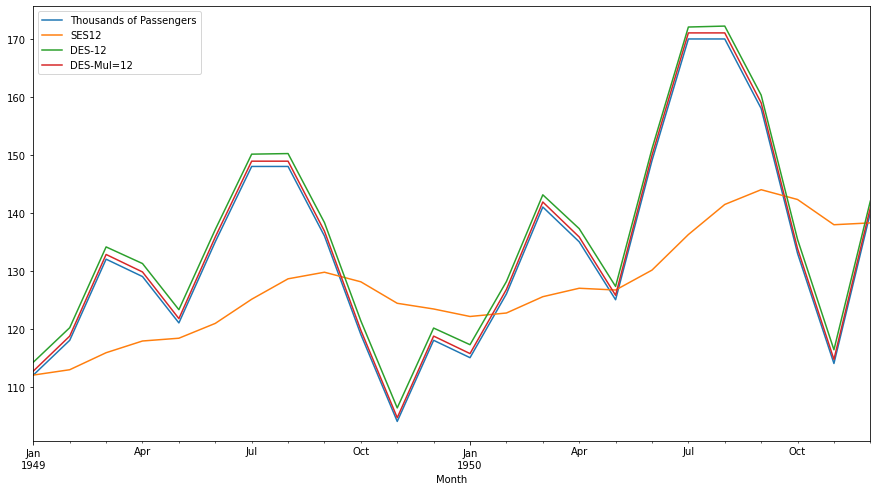

In [70]:
airline[['Thousands of Passengers', 'SES12', 'DES-12', 'DES-Mul=12']].iloc[:24].plot(figsize=(15,8))

<font color = red> <b> Triple Exponential Smoothing

In [71]:
airline["TES-Mul-12"] = ExponentialSmoothing(airline["Thousands of Passengers"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [72]:
airline.head()

,Thousands of Passengers,EWMA12,SES12,DES-12,DES-Mul=12,TES-Mul-12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.221156,112.688538,111.596793
1949-02-01,118,112.923077,112.923077,120.175837,118.725424,118.841794
1949-03-01,132,115.857988,115.857988,134.115056,132.811491,133.334074
1949-04-01,129,117.879836,117.879836,131.244976,129.793048,127.898917
1949-05-01,121,118.359861,118.359861,123.283465,121.743867,120.977474


<AxesSubplot:xlabel='Month'>

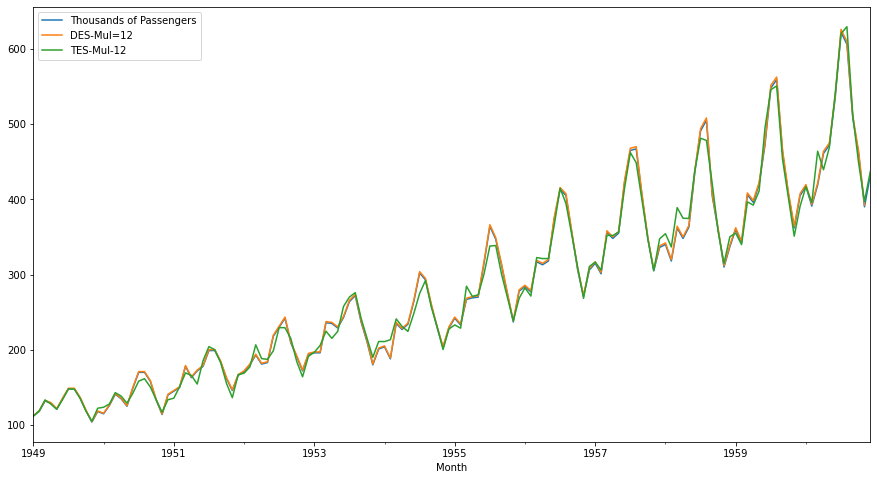

In [73]:
airline[['Thousands of Passengers', 'DES-Mul=12','TES-Mul-12']].plot(figsize=(15,8))

<AxesSubplot:xlabel='Month'>

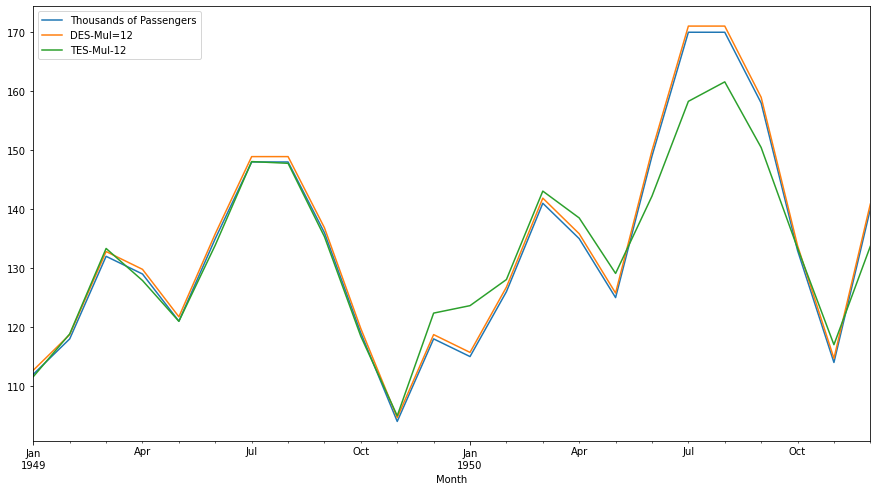

In [74]:
# First 2 years
# we can see below the DES is performing better the TES in early years of DATA.
airline[['Thousands of Passengers', 'DES-Mul=12','TES-Mul-12']].iloc[:24].plot(figsize=(15,8))

<AxesSubplot:xlabel='Month'>

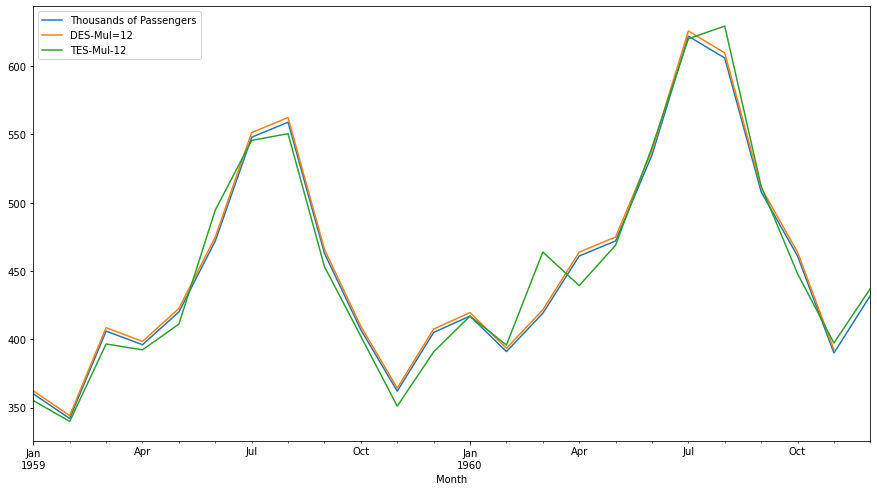

In [62]:
# Last 2 years
# TSE Improves hence can be used for forecasting the future values
airline[['Thousands of Passengers', 'DES-Mul=12','TES-Mul-12']].iloc[-24:].plot(figsize=(15,8))